In [6]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations

    def fit(self, X, y):
        y = np.where(y <= 0, -1, 1)
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)
        self.b = 0

      #Stochastic gd
        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]
         
      #Vanilla gd
        for _ in range(self.num_iterations):
            scores = np.dot(X, self.w) - self.b
            margins = 1 - scores * y

            if np.any(margins > 0):
                gradients = -np.dot(X.T, y * (margins > 0)) / num_samples
                self.w -= self.learning_rate * (gradients + 2 * self.lambda_param * self.w)
                self.b -= self.learning_rate * np.mean(-y * (margins > 0))           
        return (self.w,self.b)
        
    def predict(self, X):
        prediction = np.dot(X, self.w) - self.b
        return np.where(prediction<=0,0,1)

In [39]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

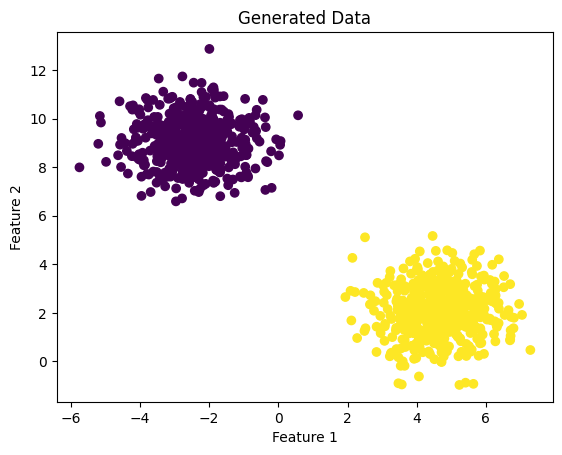

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')
plt.show()

In [41]:
svm = LinearSVM()
w,b = svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [42]:
w=w.reshape(-1,1)
b=b.reshape(-1,1)
print(w,b)

[[ 0.35026469]
 [-0.29642149]] [[-1.225325]]


Text(0.5, 1.0, 'Decision Boundary')

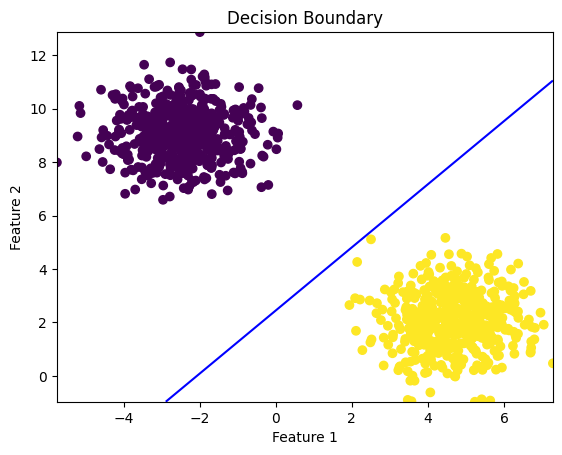

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y)

x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = (np.dot(grid, w)-b).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')